In [2]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

#Importing 
from sklearn.preprocessing import*

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance for classification models
from sklearn.metrics import *

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.multioutput import MultiOutputClassifier

#Importing Kneighborsclassifier model from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Importing Naive_bayes
from sklearn.naive_bayes import GaussianNB

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Importing SMOTE
from imblearn.over_sampling import SMOTE

In [4]:
data=pd.read_csv('OneDrive/Documents/dataset_list.csv')
data

CI_Name          CI_Cat                 CI_Subcat        WBS  \
0      SUB000508  subapplication     Web Based Application  WBS000162   
1      WBA000124     application     Web Based Application  WBS000088   
2      DTA000024     application       Desktop Application  WBS000092   
3      WBA000124     application     Web Based Application  WBS000088   
4      WBA000124     application     Web Based Application  WBS000088   
...          ...             ...                       ...        ...   
46601  SBA000464     application  Server Based Application  WBS000073   
46602  SBA000461     application  Server Based Application  WBS000073   
46603  LAP000019        computer                    Laptop  WBS000091   
46604  WBA000058     application     Web Based Application  WBS000073   
46605  DCE000077        hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  ...  \
0       IM0000004  Closed      4       4       4.0    0.601292  ...   
1       IM0000005  Closed      3       3       3.0    0.415050  ...   
2       IM0000006  Closed     NS       3       NaN    0.517551  ...   
3       IM0000011  Closed      4       4       4.0    0.642927  ...   
4       IM0000012  Closed      4       4       4.0    0.345258  ...   
...           ...     ...    ...     ...       ...         ...  ...   
46601   IM0047053  Closed      4       4       4.0    0.231896  ...   
46602   IM0047054  Closed      4       4       4.0    0.805153  ...   
46603   IM0047055  Closed      5       5       5.0    0.917466  ...   
46604   IM0047056  Closed      4       4       4.0    0.701278  ...   
46605   IM0047057  Closed      3       3       3.0    0.902320  ...   

            Reopen_Time     Resolved_Time        Close_Time  Handle_Time_hrs  \
0                   NaN  04-11-2013 13:50  04-11-2013 13:51   3,87,16,91,111   
1      02-12-2013 12:31  02-12-2013 12:36  02-12-2013 12:36   4,35,47,86,389   
2                   NaN  13-01-2014 15:12  13-01-2014 15:13   4,84,31,19,444   
3                   NaN  14-11-2013 09:31  14-11-2013 09:31   4,32,18,33,333   
4                   NaN  08-11-2013 13:55  08-11-2013 13:55   3,38,39,03,333   
...                 ...               ...               ...              ...   
46601               NaN  31-03-2014 16:29  31-03-2014 16:29            0,095   
46602               NaN  31-03-2014 15:29  31-03-2014 15:29      0,428333333   
46603               NaN  31-03-2014 15:32  31-03-2014 15:32      0,071666667   
46604               NaN  31-03-2014 15:42  31-03-2014 15:42      0,116944444   
46605               NaN  31-03-2014 22:47  31-03-2014 22:47      0,586388889   

                       Closure_Code No_of_Related_Interactions  \
0                             Other                        1.0   
1                          Software                        1.0   
2      No error - works as designed                        1.0   
3                    Operator error                        1.0   
4                             Other                        1.0   
...                             ...                        ...   
46601                         Other                        1.0   
46602                    User error                        1.0   
46603                      Hardware                        1.0   
46604                      Software                        1.0   
46605                      Hardware                        1.0   

      Related_Interaction No_of_Related_Incidents No_of_Related_Changes  \
0               SD0000007                     2.0                   NaN   
1               SD0000011                     1.0                   NaN   
2               SD0000017                     NaN                   NaN   
3               SD0000025                     NaN                   NaN   
4               SD0000029                     NaN                   NaN   
...                   ...                     ...                   ...   


In [5]:
data.head()

CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority  number_cnt  ...       Reopen_Time  \
0  Closed      4       4       4.0    0.601292  ...               NaN   
1  Closed      3       3       3.0    0.415050  ...  02-12-2013 12:31   
2  Closed     NS       3       NaN    0.517551  ...               NaN   
3  Closed      4       4       4.0    0.642927  ...               NaN   
4  Closed      4       4       4.0    0.345258  ...               NaN   

      Resolved_Time        Close_Time  Handle_Time_hrs  \
0  04-11-2013 13:50  04-11-2013 13:51   3,87,16,91,111   
1  02-12-2013 12:36  02-12-2013 12:36   4,35,47,86,389   
2  13-01-2014 15:12  13-01-2014 15:13   4,84,31,19,444   
3  14-11-2013 09:31  14-11-2013 09:31   4,32,18,33,333   
4  08-11-2013 13:55  08-11-2013 13:55   3,38,39,03,333   

                   Closure_Code No_of_Related_Interactions  \
0                         Other                        1.0   
1                      Software                        1.0   
2  No error - works as designed                        1.0   
3                Operator error                        1.0   
4                         Other                        1.0   

  Related_Interaction No_of_Related_Incidents No_of_Related_Changes  \
0           SD0000007                     2.0                   NaN   
1           SD0000011                     1.0                   NaN   
2           SD0000017                     NaN                   NaN   
3           SD0000025                     NaN                   NaN   
4           SD0000029                     NaN                   NaN   

  Related_Change  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 25 columns]

In [6]:
data.tail()

CI_Name       CI_Cat                 CI_Subcat        WBS  \
46601  SBA000464  application  Server Based Application  WBS000073   
46602  SBA000461  application  Server Based Application  WBS000073   
46603  LAP000019     computer                    Laptop  WBS000091   
46604  WBA000058  application     Web Based Application  WBS000073   
46605  DCE000077     hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  ...  \
46601   IM0047053  Closed      4       4       4.0    0.231896  ...   
46602   IM0047054  Closed      4       4       4.0    0.805153  ...   
46603   IM0047055  Closed      5       5       5.0    0.917466  ...   
46604   IM0047056  Closed      4       4       4.0    0.701278  ...   
46605   IM0047057  Closed      3       3       3.0    0.902320  ...   

      Reopen_Time     Resolved_Time        Close_Time  Handle_Time_hrs  \
46601         NaN  31-03-2014 16:29  31-03-2014 16:29            0,095   
46602         NaN  31-03-2014 15:29  31-03-2014 15:29      0,428333333   
46603         NaN  31-03-2014 15:32  31-03-2014 15:32      0,071666667   
46604         NaN  31-03-2014 15:42  31-03-2014 15:42      0,116944444   
46605         NaN  31-03-2014 22:47  31-03-2014 22:47      0,586388889   

      Closure_Code No_of_Related_Interactions Related_Interaction  \
46601        Other                        1.0           SD0147021   
46602   User error                        1.0           SD0146967   
46603     Hardware                        1.0           SD0146982   
46604     Software                        1.0           SD0146986   
46605     Hardware                        1.0           SD0147088   

      No_of_Related_Incidents No_of_Related_Changes Related_Change  
46601                     NaN                   NaN            NaN  
46602                     NaN                   NaN            NaN  
46603                     NaN                   NaN            NaN  
46604                     NaN                   NaN            NaN  
46605                     NaN                   NaN            NaN  

[5 rows x 25 columns]

In [7]:
data.sample(6)

CI_Name          CI_Cat                 CI_Subcat        WBS  \
17213  SAP000002     application                       SAP  WBS000271   
27178  SUB000533  subapplication     Web Based Application  WBS000073   
45637  WBA000133     application     Web Based Application  WBS000073   
23934  SBA000063     application  Server Based Application  WBS000264   
36450  ADB000010        database                  Database  WBS000239   
6931   SUB000455  subapplication     Web Based Application  WBS000073   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  ...  \
17213   IM0017429  Closed      5       5       5.0    0.277688  ...   
27178   IM0027449  Closed      4       4       4.0    0.929484  ...   
45637   IM0046070  Closed      5       5       5.0    0.780117  ...   
23934   IM0024187  Closed      5       5       5.0    0.151553  ...   
36450   IM0036761  Closed      3       3       3.0    0.464517  ...   
6931    IM0007088  Closed      4       4       4.0    0.339405  ...   

      Reopen_Time     Resolved_Time        Close_Time  Handle_Time_hrs  \
17213         NaN  18-12-2013 15:17  18-12-2013 15:18   1,57,08,86,111   
27178         NaN               NaN  13-01-2014 15:09   6,92,33,33,333   
45637         NaN  27-03-2014 09:21  27-03-2014 09:21   1,39,53,61,111   
23934         NaN  30-12-2013 10:56  30-12-2013 11:10   4,88,58,33,333   
36450         NaN  14-02-2014 13:34  14-02-2014 13:34   5,79,11,11,111   
6931          NaN  21-10-2013 16:14  21-10-2013 16:14   1,00,72,22,222   

      Closure_Code No_of_Related_Interactions Related_Interaction  \
17213        Other                        1.0           SD0049886   
27178     Software                        1.0           SD0082432   
45637     Software                        1.0           SD0142903   
23934        Other                        1.0           SD0072362   
36450   User error                        1.0           SD0112107   
6931         Other                        1.0           SD0018333   

      No_of_Related_Incidents No_of_Related_Changes Related_Change  
17213                     NaN                   NaN            NaN  
27178                     NaN                   NaN            NaN  
45637                     NaN                   NaN            NaN  
23934                     NaN                   NaN            NaN  
36450                     NaN                   NaN            NaN  
6931                      NaN                   NaN            NaN  

[6 rows x 25 columns]

In [8]:
data.shape

(46606, 25)

In [9]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [11]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [12]:
for col in data:
    print(col)
    print(data[col].unique())
    print(f'Number of unique values:{data[col].nunique()}')
    print(' ')

CI_Name
['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']
Number of unique values:3019
 
CI_Cat
['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
Number of unique values:12
 
CI_Subcat
['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMW

In [13]:
for i in data:
    print(data[i].value_counts())
    print(' ')

CI_Name
SUB000456    3050
SBA000263    2176
SBA000607    1743
SBA000462    1698
WBA000058    1614
             ... 
LAP001572       1
LAP000809       1
LAP000513       1
CBD000266       1
SWT000008       1
Name: count, Length: 3019, dtype: int64
 
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
 
CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Securit

In [14]:
data.describe()

Priority    number_cnt  No_of_Reassignments  \
count  45226.000000  46606.000000         46605.000000   
mean       4.215805      0.499658             1.131831   
std        0.705624      0.288634             2.269774   
min        1.000000      0.000023             0.000000   
25%        4.000000      0.248213             0.000000   
50%        4.000000      0.500269             0.000000   
75%        5.000000      0.749094             2.000000   
max        5.000000      0.999997            46.000000   

       No_of_Related_Interactions  No_of_Related_Incidents  \
count                46492.000000              1222.000000   
mean                     1.149897                 1.669394   
std                      2.556338                 3.339687   
min                      1.000000                 1.000000   
25%                      1.000000                 1.000000   
50%                      1.000000                 1.000000   
75%                      1.000000                 1.000000   
max                    370.000000                63.000000   

       No_of_Related_Changes  
count             560.000000  
mean                1.058929  
std                 0.403596  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.000000  
max                 9.000000

## Exploratory Data Analysis

In [15]:
report=ProfileReport(data,title='ITSM Report',explorative=False)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df=pd.read_csv('OneDrive/Documents/dataset_list.csv')
df

CI_Name          CI_Cat                 CI_Subcat        WBS  \
0      SUB000508  subapplication     Web Based Application  WBS000162   
1      WBA000124     application     Web Based Application  WBS000088   
2      DTA000024     application       Desktop Application  WBS000092   
3      WBA000124     application     Web Based Application  WBS000088   
4      WBA000124     application     Web Based Application  WBS000088   
...          ...             ...                       ...        ...   
46601  SBA000464     application  Server Based Application  WBS000073   
46602  SBA000461     application  Server Based Application  WBS000073   
46603  LAP000019        computer                    Laptop  WBS000091   
46604  WBA000058     application     Web Based Application  WBS000073   
46605  DCE000077        hardware       DataCenterEquipment  WBS000267   

      Incident_ID  Status Impact Urgency  Priority  number_cnt  ...  \
0       IM0000004  Closed      4       4       4.0    0.601292  ...   
1       IM0000005  Closed      3       3       3.0    0.415050  ...   
2       IM0000006  Closed     NS       3       NaN    0.517551  ...   
3       IM0000011  Closed      4       4       4.0    0.642927  ...   
4       IM0000012  Closed      4       4       4.0    0.345258  ...   
...           ...     ...    ...     ...       ...         ...  ...   
46601   IM0047053  Closed      4       4       4.0    0.231896  ...   
46602   IM0047054  Closed      4       4       4.0    0.805153  ...   
46603   IM0047055  Closed      5       5       5.0    0.917466  ...   
46604   IM0047056  Closed      4       4       4.0    0.701278  ...   
46605   IM0047057  Closed      3       3       3.0    0.902320  ...   

            Reopen_Time     Resolved_Time        Close_Time  Handle_Time_hrs  \
0                   NaN  04-11-2013 13:50  04-11-2013 13:51   3,87,16,91,111   
1      02-12-2013 12:31  02-12-2013 12:36  02-12-2013 12:36   4,35,47,86,389   
2                   NaN  13-01-2014 15:12  13-01-2014 15:13   4,84,31,19,444   
3                   NaN  14-11-2013 09:31  14-11-2013 09:31   4,32,18,33,333   
4                   NaN  08-11-2013 13:55  08-11-2013 13:55   3,38,39,03,333   
...                 ...               ...               ...              ...   
46601               NaN  31-03-2014 16:29  31-03-2014 16:29            0,095   
46602               NaN  31-03-2014 15:29  31-03-2014 15:29      0,428333333   
46603               NaN  31-03-2014 15:32  31-03-2014 15:32      0,071666667   
46604               NaN  31-03-2014 15:42  31-03-2014 15:42      0,116944444   
46605               NaN  31-03-2014 22:47  31-03-2014 22:47      0,586388889   

                       Closure_Code No_of_Related_Interactions  \
0                             Other                        1.0   
1                          Software                        1.0   
2      No error - works as designed                        1.0   
3                    Operator error                        1.0   
4                             Other                        1.0   
...                             ...                        ...   
46601                         Other                        1.0   
46602                    User error                        1.0   
46603                      Hardware                        1.0   
46604                      Software                        1.0   
46605                      Hardware                        1.0   

      Related_Interaction No_of_Related_Incidents No_of_Related_Changes  \
0               SD0000007                     2.0                   NaN   
1               SD0000011                     1.0                   NaN   
2               SD0000017                     NaN                   NaN   
3               SD0000025                     NaN                   NaN   
4               SD0000029                     NaN                   NaN   
...                   ...                     ...                   ...   


In [33]:
df.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [34]:
#dropping unrequired columns and printing the columns having null values
df.drop(columns=[
    'Handle_Time_hrs',
    'Alert_Status',
    'No_of_Related_Incidents',
    'No_of_Related_Changes',
    'Related_Change','Reopen_Time'
], inplace=True)

null_summary = df.isnull().sum()
print("Remaining Nulls:\n", null_summary[null_summary > 0])


Remaining Nulls:
 CI_Cat                         111
CI_Subcat                      111
Priority                      1380
No_of_Reassignments              1
Resolved_Time                 1780
Closure_Code                   460
No_of_Related_Interactions     114
dtype: int64


In [35]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], errors='coerce')
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'], errors='coerce')
df['Close_Time'] = pd.to_datetime(df['Close_Time'], errors='coerce')

df['Impact'] = pd.to_numeric(df['Impact'], errors='coerce')
df['Urgency'] = pd.to_numeric(df['Urgency'], errors='coerce')
df['Priority'] = pd.to_numeric(df['Priority'], errors='coerce')
df['No_of_Reassignments'] = pd.to_numeric(df['No_of_Reassignments'], errors='coerce')
df['No_of_Related_Interactions'] = pd.to_numeric(df['No_of_Related_Interactions'], errors='coerce')

categorical_cols = ['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 
                    'Status', 'Category', 'KB_number', 'Closure_Code', 'Related_Interaction']

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [36]:
df['Impact'].fillna(df['Impact'].mode()[0], inplace=True)
df['Priority'].fillna(df['Priority'].mode()[0], inplace=True)

df['Urgency'].fillna(df['Urgency'].mode()[0], inplace=True)

df['No_of_Reassignments'].fillna(df['No_of_Reassignments'].median(), inplace=True)

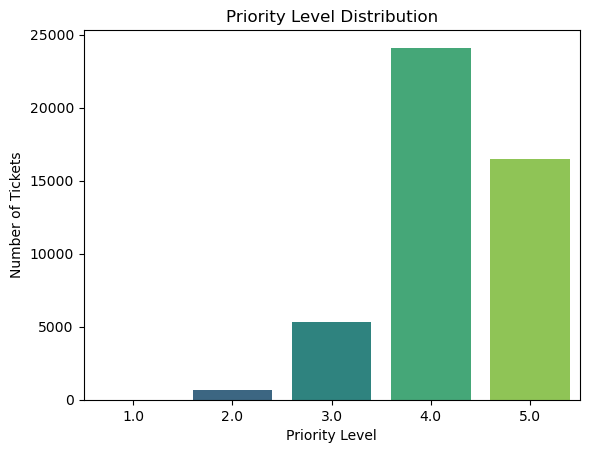

In [37]:
sns.countplot(data=df, x='Priority', palette='viridis')
plt.title('Priority Level Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.show()

In [38]:
pivot_table = df.pivot_table(index='CI_Cat', columns='Priority', aggfunc='size', fill_value=0)
print(pivot_table)

Priority              1.0  2.0   3.0    4.0    5.0
CI_Cat                                            
Phone                   0    1     1      0      0
application             1  194  4017  16491  12197
applicationcomponent    0    0     3      2      0
computer                0  425   372    831   2015
database                0    0   144     62      8
displaydevice           0    0     1    201     10
hardware                0    6   143    115    178
networkcomponents       0   22    34     39     12
officeelectronics       0    0    37     78     37
software                0    3   131    150     49
storage                 0    5   188    396    114
subapplication          2   33   239   5701   1807


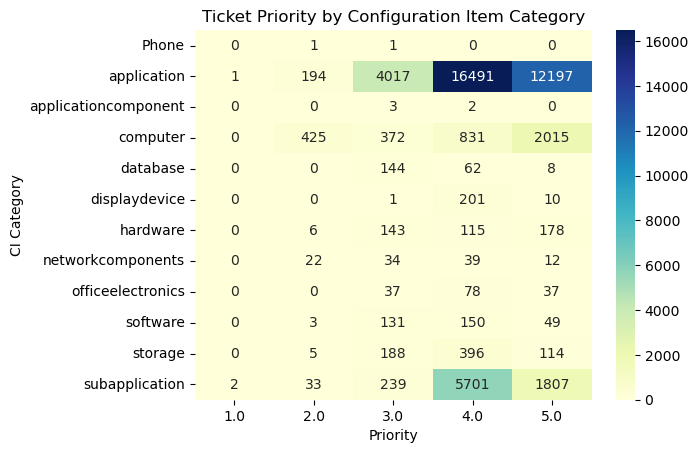

In [39]:
pivot_table = df.pivot_table(index='CI_Cat', columns='Priority', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='g')
plt.title('Ticket Priority by Configuration Item Category')
plt.ylabel('CI Category')
plt.xlabel('Priority')
plt.show()

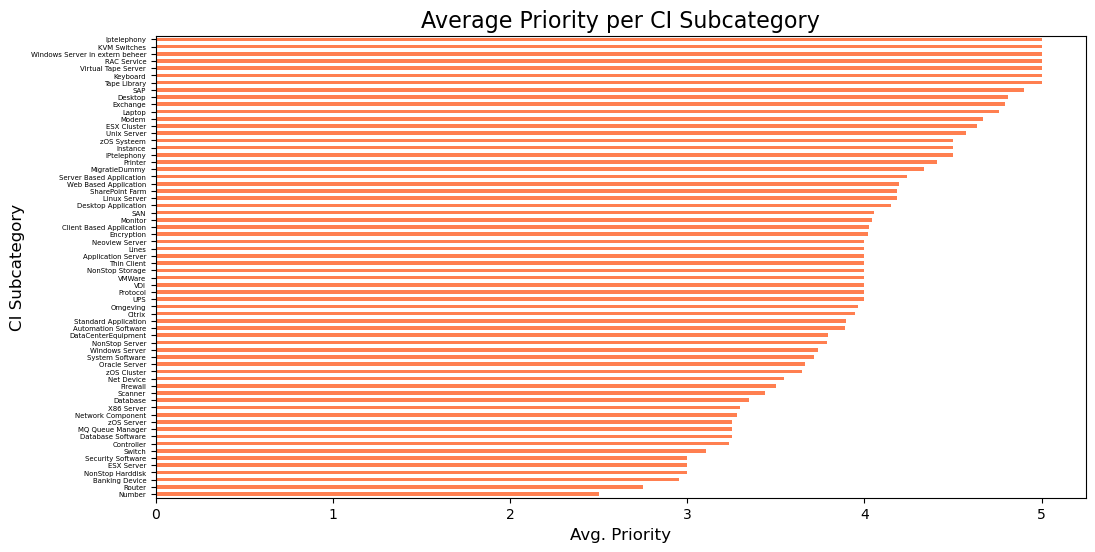

In [40]:
plt.figure(figsize=(12, 6))  

avg_priority_by_subcat = df.groupby('CI_Subcat')['Priority'].mean().sort_values()

avg_priority_by_subcat.plot(kind='barh', color='coral')

plt.title('Average Priority per CI Subcategory', fontsize=16)
plt.xlabel('Avg. Priority', fontsize=12)
plt.ylabel('CI Subcategory', fontsize=12)

plt.yticks(fontsize=5, rotation=0)  

plt.show()

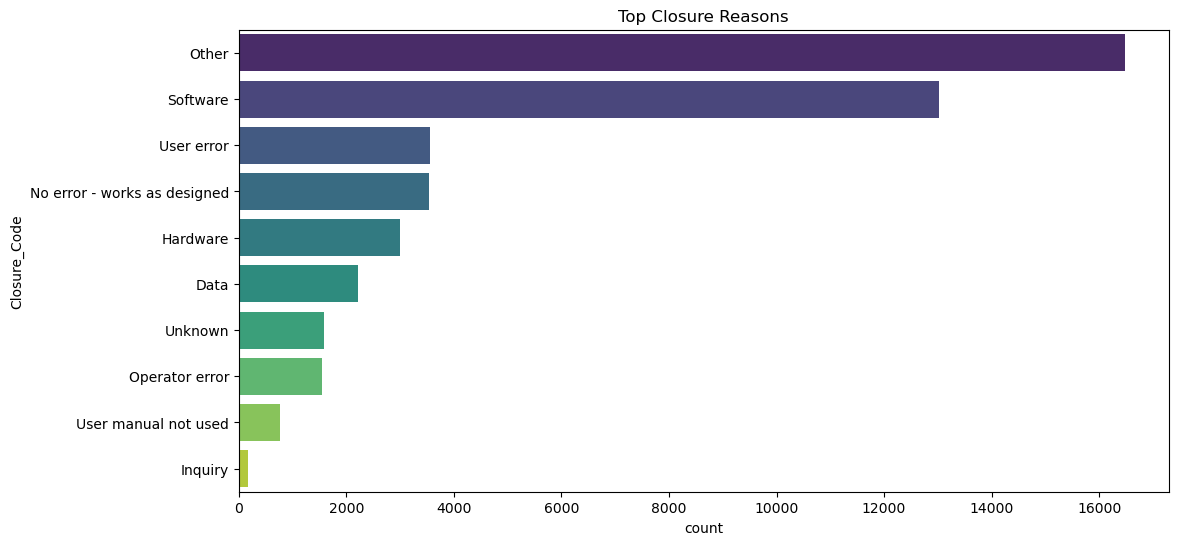

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Closure_Code', order=df['Closure_Code'].value_counts().index[:10], palette='viridis')
plt.title('Top Closure Reasons')
plt.show()

Insights:
1. Tickets with low priority occur most frequently across the dataset.
2. The subcategory 'number' is associated with a relatively low average priority.
3. 'Software' ranks as the second most common closure reason.
4. Most low-priority tickets are associated with the application category, indicating lower urgency for application-related issues.

### Data Preprocessing

#### Encoding

In [42]:
data.drop(columns=['Alert_Status','Reopen_Time','No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],axis=1,errors='ignore',inplace=True)

In [43]:
le_cols=['CI_Cat','CI_Subcat','Status','Closure_Code', 'Category']
le=LabelEncoder()
for col in le_cols:
    data[col]=le.fit_transform(data[col])

In [44]:
data.dropna(inplace=True)
data

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
0      SUB000508      10         44  WBS000162   IM0000004       0     4.0   
1      WBA000124       0         44  WBS000088   IM0000005       0     3.0   
4      WBA000124       0         44  WBS000088   IM0000012       0     4.0   
5      WBA000124       0         44  WBS000088   IM0000013       0     4.0   
9      WBA000082       0         44  WBS000055   IM0000018       0     4.0   
...          ...     ...        ...        ...         ...     ...     ...   
42831  SUB000456      10         44  WBS000073   IM0043199       0     4.0   
42833  SBA000461       0         36  WBS000073   IM0043201       0     4.0   
42835  SBA000063       0         36  WBS000264   IM0043203       0     5.0   
42837  WBA000011       0         44  WBS000152   IM0043205       0     5.0   
42838  SBA000805       0         36  WBS000016   IM0043206       0     3.0   

       Urgency  Priority  number_cnt  Category  KB_number  \
0          4.0       4.0    0.601292         0  KM0000553   
1          3.0       3.0    0.415050         0  KM0000611   
4          4.0       4.0    0.345258         0  KM0000611   
5          4.0       4.0    0.006676         0  KM0000611   
9          4.0       4.0    0.306670         0  KM0000401   
...        ...       ...         ...       ...        ...   
42831      4.0       4.0    0.010665         0  KM0001998   
42833      4.0       4.0    0.047552         0  KM0002352   
42835      5.0       5.0    0.743878         0  KM0001622   
42837      5.0       5.0    0.186316         0  KM0002320   
42838      3.0       3.0    0.093431         0  KM0000938   

       No_of_Reassignments           Open_Time       Resolved_Time  \
0                     26.0 2012-05-02 13:32:00 2013-04-11 13:50:00   
1                     33.0 2012-12-03 15:44:00 2013-02-12 12:36:00   
4                      2.0 2012-10-08 11:01:00 2013-08-11 13:55:00   
5                      4.0 2012-10-08 11:27:00 2013-08-11 13:54:00   
9                      2.0 2012-03-09 16:04:00 2013-08-11 14:33:00   
...                    ...                 ...                 ...   
42831                  0.0 2014-12-03 16:02:00 2014-12-03 16:31:00   
42833                  0.0 2014-12-03 16:05:00 2014-12-03 16:09:00   
42835                  0.0 2014-12-03 16:11:00 2014-12-03 16:18:00   
42837                  0.0 2014-12-03 16:35:00 2014-12-03 17:06:00   
42838                  0.0 2014-12-03 16:36:00 2014-12-03 16:37:00   

               Close_Time  Closure_Code  No_of_Related_Interactions  \
0     2013-04-11 13:51:00             5                         1.0   
1     2013-02-12 12:36:00             8                         1.0   
4     2013-08-11 13:55:00             5                         1.0   
5     2013-08-11 13:54:00             5                         1.0   
9     2013-08-11 14:35:00             3                         1.0   
...                   ...           ...                         ...   
42831 2014-12-03 16:31:00             0                         1.0   
42833 2014-12-03 16:09:00             8                         1.0   
42835 2014-12-03 16:18:00             5                         1.0   
42837 2014-12-03 17:07:00             5                         1.0   
42838 2014-12-03 16:37:00             8                         1.0   

      Related_Interaction  
0               SD0000007  
1               SD0000011  
4               SD0000029  
5               SD0000031  
9               SD0000037  
...                   ...  
42831           SD0132833  
42833           SD0132834  
42835           SD0132838  
42837           SD0132842  
42838           SD0132846  

[14151 rows x 19 columns]

In [45]:
data['Urgency'] = data['Urgency'].astype(str).str.extract('(\d)').astype(int)

In [46]:
data['Impact']= data['Impact'].astype(str).str.extract('(\d)').astype(int)

In [47]:
#final preprocessed data
data

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
0      SUB000508      10         44  WBS000162   IM0000004       0       4   
1      WBA000124       0         44  WBS000088   IM0000005       0       3   
4      WBA000124       0         44  WBS000088   IM0000012       0       4   
5      WBA000124       0         44  WBS000088   IM0000013       0       4   
9      WBA000082       0         44  WBS000055   IM0000018       0       4   
...          ...     ...        ...        ...         ...     ...     ...   
42831  SUB000456      10         44  WBS000073   IM0043199       0       4   
42833  SBA000461       0         36  WBS000073   IM0043201       0       4   
42835  SBA000063       0         36  WBS000264   IM0043203       0       5   
42837  WBA000011       0         44  WBS000152   IM0043205       0       5   
42838  SBA000805       0         36  WBS000016   IM0043206       0       3   

       Urgency  Priority  number_cnt  Category  KB_number  \
0            4       4.0    0.601292         0  KM0000553   
1            3       3.0    0.415050         0  KM0000611   
4            4       4.0    0.345258         0  KM0000611   
5            4       4.0    0.006676         0  KM0000611   
9            4       4.0    0.306670         0  KM0000401   
...        ...       ...         ...       ...        ...   
42831        4       4.0    0.010665         0  KM0001998   
42833        4       4.0    0.047552         0  KM0002352   
42835        5       5.0    0.743878         0  KM0001622   
42837        5       5.0    0.186316         0  KM0002320   
42838        3       3.0    0.093431         0  KM0000938   

       No_of_Reassignments           Open_Time       Resolved_Time  \
0                     26.0 2012-05-02 13:32:00 2013-04-11 13:50:00   
1                     33.0 2012-12-03 15:44:00 2013-02-12 12:36:00   
4                      2.0 2012-10-08 11:01:00 2013-08-11 13:55:00   
5                      4.0 2012-10-08 11:27:00 2013-08-11 13:54:00   
9                      2.0 2012-03-09 16:04:00 2013-08-11 14:33:00   
...                    ...                 ...                 ...   
42831                  0.0 2014-12-03 16:02:00 2014-12-03 16:31:00   
42833                  0.0 2014-12-03 16:05:00 2014-12-03 16:09:00   
42835                  0.0 2014-12-03 16:11:00 2014-12-03 16:18:00   
42837                  0.0 2014-12-03 16:35:00 2014-12-03 17:06:00   
42838                  0.0 2014-12-03 16:36:00 2014-12-03 16:37:00   

               Close_Time  Closure_Code  No_of_Related_Interactions  \
0     2013-04-11 13:51:00             5                         1.0   
1     2013-02-12 12:36:00             8                         1.0   
4     2013-08-11 13:55:00             5                         1.0   
5     2013-08-11 13:54:00             5                         1.0   
9     2013-08-11 14:35:00             3                         1.0   
...                   ...           ...                         ...   
42831 2014-12-03 16:31:00             0                         1.0   
42833 2014-12-03 16:09:00             8                         1.0   
42835 2014-12-03 16:18:00             5                         1.0   
42837 2014-12-03 17:07:00             5                         1.0   
42838 2014-12-03 16:37:00             8                         1.0   

      Related_Interaction  
0               SD0000007  
1               SD0000011  
4               SD0000029  
5               SD0000031  
9               SD0000037  
...                   ...  
42831           SD0132833  
42833           SD0132834  
42835           SD0132838  
42837           SD0132842  
42838           SD0132846  

[14151 rows x 19 columns]

### To predict high-priority(1 & 2) incidents for proactive resolution.

In [48]:
df1=data.copy()

In [49]:
#encoding CI_Name feature
ci_name_freq = data['CI_Name'].value_counts(normalize=True)
df1['CI_Name'] = df1['CI_Name'].map(ci_name_freq)

In [50]:
#creating a target column
df1['Priority'] = df1['Priority'].astype(int)
df1['High_Priority_Flag'] = df1['Priority'].apply(lambda x: 1 if x in [1, 2] else 0)

In [51]:
df1['High_Priority_Flag'].value_counts()

High_Priority_Flag
0    14004
1      147
Name: count, dtype: int64

In [52]:
high_priority_conditions = (
    ((df1['Impact'] == 1) & (df1['Urgency'].isin([1, 2]))) |
    ((df1['Impact'] == 2) & (df1['Urgency'].isin([1, 2,3]))) |
    ((df1['Impact'] == 3) & (df1['Urgency'].isin([1,2])))
)

df_high_priority = df1[high_priority_conditions]
df_high_priority

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
1185   0.000071       2          1  WBS000146   IM0001285       0       2   
1186   0.000071       2          1  WBS000146   IM0001286       0       2   
1203   0.005724       0         44  WBS000172   IM0001303       0       2   
1221   0.000141       2          1  WBS000146   IM0001321       0       2   
1244   0.000071       2          1  WBS000146   IM0001344       0       2   
...         ...     ...        ...        ...         ...     ...     ...   
41939  0.000495       5          5  WBS000118   IM0042294       0       2   
42094  0.000495       5          5  WBS000118   IM0042455       0       2   
42487  0.001767       0         44  WBS000298   IM0042851       0       2   
42572  0.017737       0          9  WBS000094   IM0042938       0       2   
42656  0.009399       0         36  WBS000307   IM0043023       0       2   

       Urgency  Priority  number_cnt  Category  KB_number  \
1185         2         2    0.570667         0  KM0000491   
1186         2         2    0.463489         0  KM0000491   
1203         2         2    0.162129         0  KM0001979   
1221         2         2    0.481147         0  KM0000274   
1244         2         2    0.300271         0  KM0000274   
...        ...       ...         ...       ...        ...   
41939        2         2    0.858811         0  KM0000966   
42094        2         2    0.363892         0  KM0002354   
42487        2         2    0.152373         0  KM0001644   
42572        2         2    0.884727         0  KM0000539   
42656        2         2    0.227959         0  KM0001350   

       No_of_Reassignments           Open_Time       Resolved_Time  \
1185                   1.0 2013-01-10 10:10:00 2013-01-10 12:57:00   
1186                   1.0 2013-01-10 10:10:00 2013-01-10 12:46:00   
1203                   0.0 2013-01-10 08:43:00 2013-01-10 09:20:00   
1221                   1.0 2013-01-10 09:46:00 2013-01-10 12:30:00   
1244                   1.0 2013-01-10 09:17:00 2013-03-10 10:11:00   
...                    ...                 ...                 ...   
41939                  1.0 2014-10-03 14:08:00 2014-11-03 08:03:00   
42094                  1.0 2014-10-03 14:08:00 2014-11-03 10:40:00   
42487                  0.0 2014-11-03 15:27:00 2014-11-03 16:36:00   
42572                  2.0 2014-12-03 09:20:00 2014-12-03 15:09:00   
42656                  0.0 2014-12-03 10:21:00 2014-12-03 11:58:00   

               Close_Time  Closure_Code  No_of_Related_Interactions  \
1185  2013-01-10 12:57:00             5                         1.0   
1186  2013-01-10 12:46:00             1                         1.0   
1203  2013-01-10 09:21:00             5                         1.0   
1221  2013-01-10 12:30:00             1                         1.0   
1244  2013-03-10 10:11:00             1                         1.0   
...                   ...           ...                         ...   
41939 2014-11-03 08:04:00             8                         1.0   
42094 2014-11-03 10:40:00             0                         1.0   
42487 2014-11-03 16:37:00             5                         1.0   
42572 2014-12-03 15:09:00             8                         3.0   
42656 2014-12-03 12:00:00             0                         1.0   

      Related_Interaction  High_Priority_Flag  
1185            SD0001738                   1  
1186            SD0001741                   1  
1203            SD0001584                   1  
1221            SD0001855                   1  
1244            SD0001775                   1  
...                   ...                 ...  
41939           SD0130157                   1  
42094           SD0130091                   1  
42487           SD0131684                   1  
42572         #MULTIVALUE                   1  
42656           SD0132048                   1  

[147 rows x 20 columns]

#### Data Splitting

In [53]:
x=df1.loc[:,['CI_Name', 'CI_Subcat', 'Status','number_cnt','Category']]
y=df1['High_Priority_Flag']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [56]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
High_Priority_Flag
0    11202
1    11202
Name: count, dtype: int64


#### Model Building

#### Logistic Regression

In [57]:
lr=LogisticRegression()
lr.fit(x_train_smote, y_train_smote)
lr_pred=lr.predict(x_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
print(f'Accuracy_score:{lr_accuracy:.4f}')

Accuracy_score:0.6637


In [58]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.66      0.80      2802
           1       0.02      0.72      0.04        29

    accuracy                           0.66      2831
   macro avg       0.51      0.69      0.42      2831
weighted avg       0.99      0.66      0.79      2831



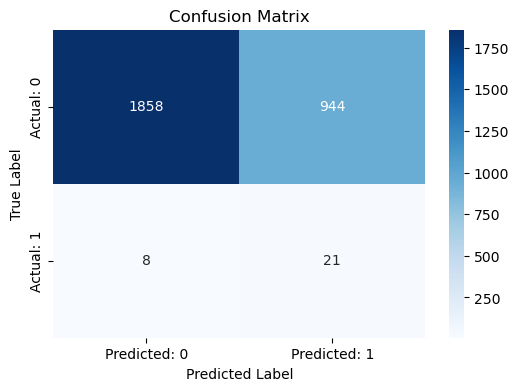

In [59]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### RandomForest

In [60]:
rf=RandomForestClassifier()
rf.fit(x_train_smote,y_train_smote)
rf_pred=rf.predict(x_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
print(f'Accuracy_score:{rf_accuracy:.4f}')

Accuracy_score:0.9460


In [61]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2802
           1       0.09      0.45      0.15        29

    accuracy                           0.95      2831
   macro avg       0.54      0.70      0.56      2831
weighted avg       0.98      0.95      0.96      2831



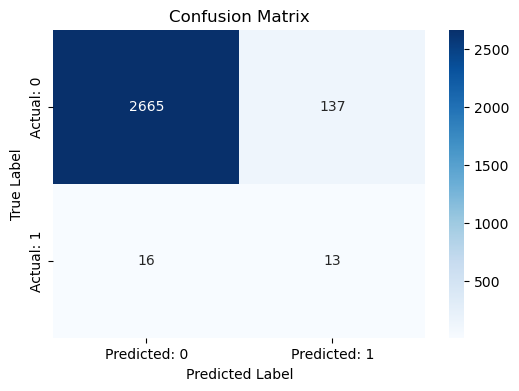

In [62]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Decision Tree

In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train_smote,y_train_smote)
dt_pred=dt.predict(x_test)
dt_accuracy=accuracy_score(y_test,dt_pred)
print(f'Accuracy_score:{dt_accuracy:.4f}')

Accuracy_score:0.9452


In [70]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2802
           1       0.09      0.45      0.15        29

    accuracy                           0.95      2831
   macro avg       0.54      0.70      0.56      2831
weighted avg       0.98      0.95      0.96      2831



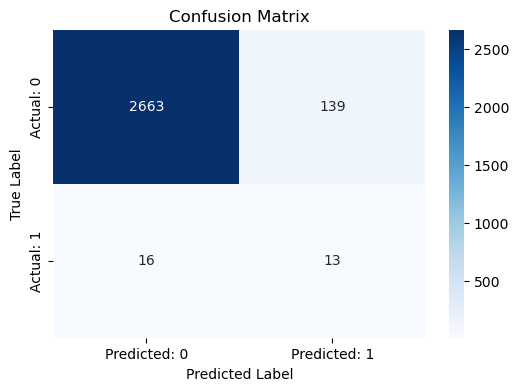

In [72]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### SVC

In [63]:
svc_model = SVC()  
svc_model.fit(x_train_smote, y_train_smote)

svc_pred = svc_model.predict(x_test)
svc_accuracy=accuracy_score(y_test,svc_pred)
print(f'Accuracy_score:{svc_accuracy:.4f}')

Accuracy_score:0.9611


In [64]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2802
           1       0.11      0.41      0.18        29

    accuracy                           0.96      2831
   macro avg       0.55      0.69      0.58      2831
weighted avg       0.98      0.96      0.97      2831



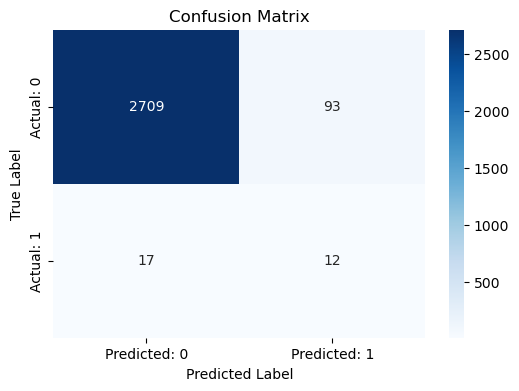

In [65]:
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Model Comparison Report

In [73]:
comparison_dict = {'Model': ['LogisticRegression','RandomForestClassifier','Decision Tree','SVC'],
                   'accuracy_score': [lr_accuracy,rf_accuracy,dt_accuracy,svc_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
    LogisticRegression        0.663723
RandomForestClassifier        0.947015
         Decision Tree        0.945249
                   SVC        0.961144


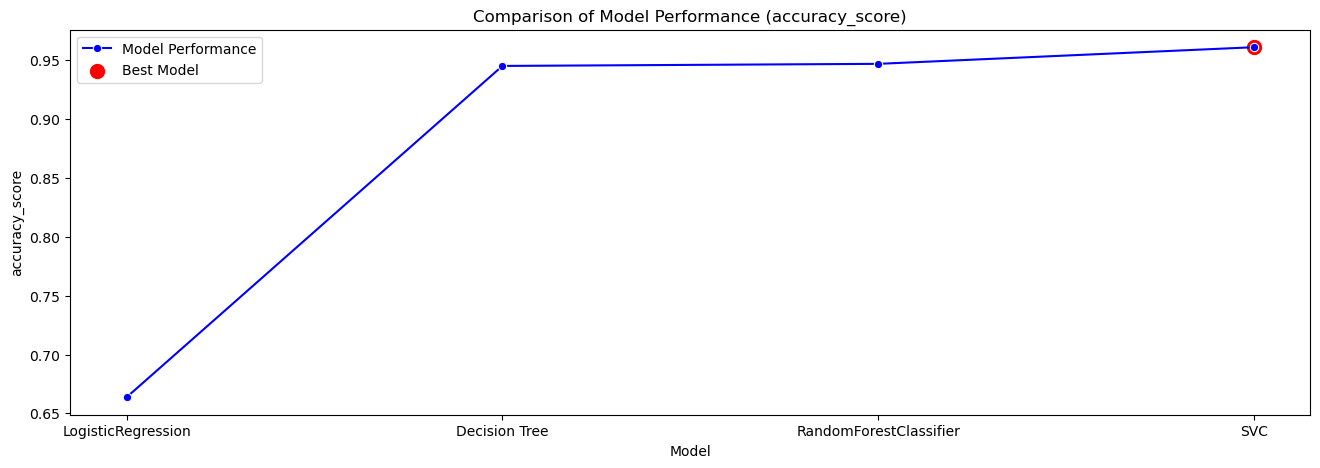

In [74]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### To forecast incident volumes for better resource planning.

#### Quarterly Forecasting

In [75]:
df2=data.copy()

In [76]:
df2

CI_Name  CI_Cat  CI_Subcat        WBS Incident_ID  Status  Impact  \
0      SUB000508      10         44  WBS000162   IM0000004       0       4   
1      WBA000124       0         44  WBS000088   IM0000005       0       3   
4      WBA000124       0         44  WBS000088   IM0000012       0       4   
5      WBA000124       0         44  WBS000088   IM0000013       0       4   
9      WBA000082       0         44  WBS000055   IM0000018       0       4   
...          ...     ...        ...        ...         ...     ...     ...   
42831  SUB000456      10         44  WBS000073   IM0043199       0       4   
42833  SBA000461       0         36  WBS000073   IM0043201       0       4   
42835  SBA000063       0         36  WBS000264   IM0043203       0       5   
42837  WBA000011       0         44  WBS000152   IM0043205       0       5   
42838  SBA000805       0         36  WBS000016   IM0043206       0       3   

       Urgency  Priority  number_cnt  Category  KB_number  \
0            4       4.0    0.601292         0  KM0000553   
1            3       3.0    0.415050         0  KM0000611   
4            4       4.0    0.345258         0  KM0000611   
5            4       4.0    0.006676         0  KM0000611   
9            4       4.0    0.306670         0  KM0000401   
...        ...       ...         ...       ...        ...   
42831        4       4.0    0.010665         0  KM0001998   
42833        4       4.0    0.047552         0  KM0002352   
42835        5       5.0    0.743878         0  KM0001622   
42837        5       5.0    0.186316         0  KM0002320   
42838        3       3.0    0.093431         0  KM0000938   

       No_of_Reassignments           Open_Time       Resolved_Time  \
0                     26.0 2012-05-02 13:32:00 2013-04-11 13:50:00   
1                     33.0 2012-12-03 15:44:00 2013-02-12 12:36:00   
4                      2.0 2012-10-08 11:01:00 2013-08-11 13:55:00   
5                      4.0 2012-10-08 11:27:00 2013-08-11 13:54:00   
9                      2.0 2012-03-09 16:04:00 2013-08-11 14:33:00   
...                    ...                 ...                 ...   
42831                  0.0 2014-12-03 16:02:00 2014-12-03 16:31:00   
42833                  0.0 2014-12-03 16:05:00 2014-12-03 16:09:00   
42835                  0.0 2014-12-03 16:11:00 2014-12-03 16:18:00   
42837                  0.0 2014-12-03 16:35:00 2014-12-03 17:06:00   
42838                  0.0 2014-12-03 16:36:00 2014-12-03 16:37:00   

               Close_Time  Closure_Code  No_of_Related_Interactions  \
0     2013-04-11 13:51:00             5                         1.0   
1     2013-02-12 12:36:00             8                         1.0   
4     2013-08-11 13:55:00             5                         1.0   
5     2013-08-11 13:54:00             5                         1.0   
9     2013-08-11 14:35:00             3                         1.0   
...                   ...           ...                         ...   
42831 2014-12-03 16:31:00             0                         1.0   
42833 2014-12-03 16:09:00             8                         1.0   
42835 2014-12-03 16:18:00             5                         1.0   
42837 2014-12-03 17:07:00             5                         1.0   
42838 2014-12-03 16:37:00             8                         1.0   

      Related_Interaction  
0               SD0000007  
1               SD0000011  
4               SD0000029  
5               SD0000031  
9               SD0000037  
...                   ...  
42831           SD0132833  
42833           SD0132834  
42835           SD0132838  
42837           SD0132842  
42838           SD0132846  

[14151 rows x 19 columns]

In [77]:
df2['Open_Time'] = pd.to_datetime(df2['Open_Time'],errors='coerce')

In [78]:
invalid_dates = df2['Open_Time'].isna().sum()
print(f"Number of invalid or unparseable datetime entries: {invalid_dates}")

Number of invalid or unparseable datetime entries: 0


In [79]:
invalid_rows = df2[df2['Open_Time'].isna()]
print(invalid_rows[['Incident_ID', 'Open_Time']].head())

Empty DataFrame
Columns: [Incident_ID, Open_Time]
Index: []


In [80]:
df2 = df2.dropna(subset=['Open_Time'])

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14151 entries, 0 to 42838
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     14151 non-null  category      
 1   CI_Cat                      14151 non-null  int64         
 2   CI_Subcat                   14151 non-null  int64         
 3   WBS                         14151 non-null  category      
 4   Incident_ID                 14151 non-null  category      
 5   Status                      14151 non-null  int64         
 6   Impact                      14151 non-null  int32         
 7   Urgency                     14151 non-null  int32         
 8   Priority                    14151 non-null  float64       
 9   number_cnt                  14151 non-null  float64       
 10  Category                    14151 non-null  int64         
 11  KB_number                   14151 non-null  category      


In [82]:
df2['Quarter'] = df2['Open_Time'].dt.to_period('Q')
quarterly_data = df2.groupby('Quarter')['Incident_ID'].count().reset_index()
quarterly_data 

Quarter  Incident_ID
0   2012Q1            3
1   2012Q2            1
2   2012Q4            3
3   2013Q1         2119
4   2013Q2         2273
5   2013Q3         1796
6   2013Q4         1539
7   2014Q1         1228
8   2014Q2         2263
9   2014Q3         1381
10  2014Q4         1545

In [83]:
quarterly_data['Quarter'] = quarterly_data['Quarter'].dt.to_timestamp()
quarterly_data.set_index('Quarter', inplace=True)

In [84]:
quarterly_data

Incident_ID
Quarter                
2012-01-01            3
2012-04-01            1
2012-10-01            3
2013-01-01         2119
2013-04-01         2273
2013-07-01         1796
2013-10-01         1539
2014-01-01         1228
2014-04-01         2263
2014-07-01         1381
2014-10-01         1545

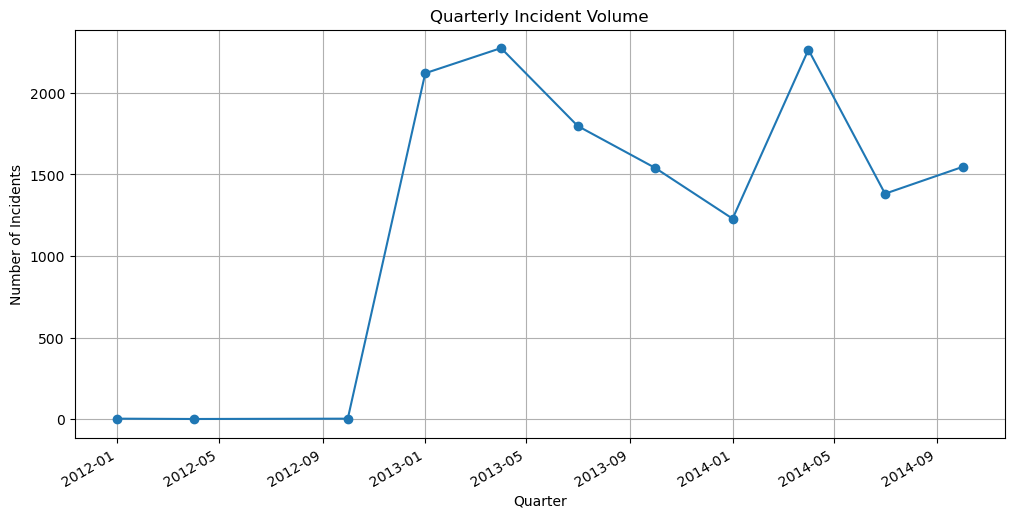

In [85]:
quarterly_data['Incident_ID'].plot(marker='o', figsize=(12, 6), title='Quarterly Incident Volume')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

#### ARIMA Model

In [86]:
model = ARIMA(quarterly_data['Incident_ID'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=8)
forecast

11    1424.262790
12    1335.600712
13    1270.492662
14    1222.681262
15    1187.571472
16    1161.788972
17    1142.855870
18    1128.952548
Name: predicted_mean, dtype: float64

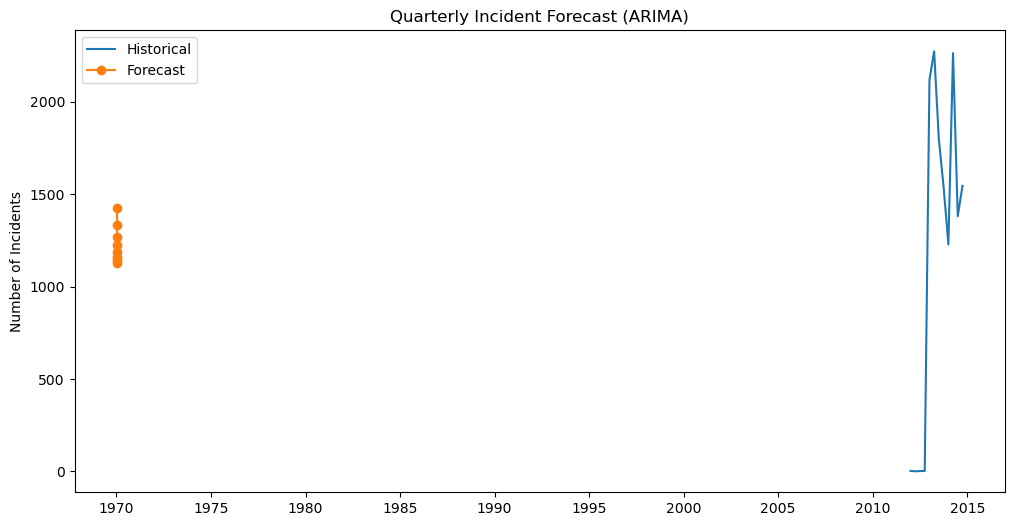

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data['Incident_ID'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Quarterly Incident Forecast (ARIMA)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### SARIMAX Model

In [88]:
model = SARIMAX(quarterly_data['Incident_ID'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 4)) 

model_fit = model.fit()

sarimax_forecast = model_fit.forecast(steps=8)
sarimax_forecast

11   -10.997066
12     0.997511
13   -29.433951
14    12.103547
15   -18.329179
16    -3.336692
17   -41.375330
18    10.545848
Name: predicted_mean, dtype: float64

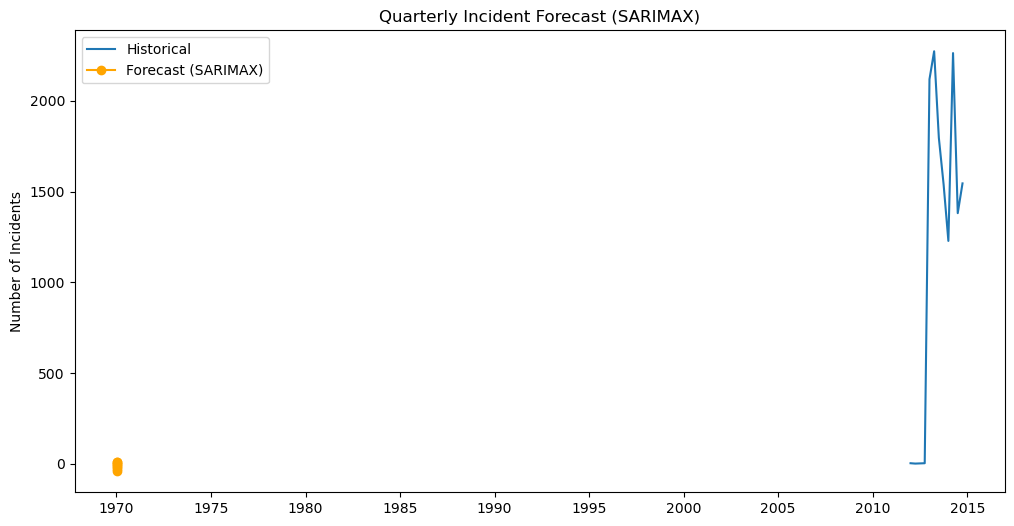

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['Incident_ID'], label='Historical')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='Forecast (SARIMAX)', marker='o', color='orange')
plt.title('Quarterly Incident Forecast (SARIMAX)')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### Yearly Forecasting

In [90]:
df2['Year'] = df2['Open_Time'].dt.year
annual_data = df2.groupby('Year')['Incident_ID'].count().reset_index()
annual_data

Year  Incident_ID
0  2012            7
1  2013         7727
2  2014         6417

In [91]:
annual_data['Year'] = pd.to_datetime(annual_data['Year'], format='%Y')

annual_data.set_index('Year', inplace=True)

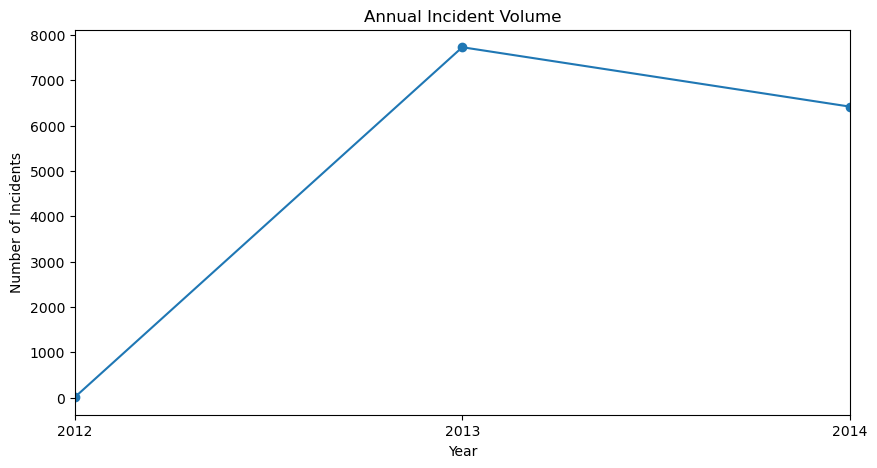

In [92]:
annual_data['Incident_ID'].plot(marker='o', figsize=(10, 5), title='Annual Incident Volume')
plt.ylabel('Number of Incidents')
plt.show()

#### ARIMA Model

In [93]:
model = ARIMA(annual_data['Incident_ID'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)
forecast

2015-01-01    5302.578720
2016-01-01    4600.335413
2017-01-01    4157.822629
Freq: YS-JAN, Name: predicted_mean, dtype: float64

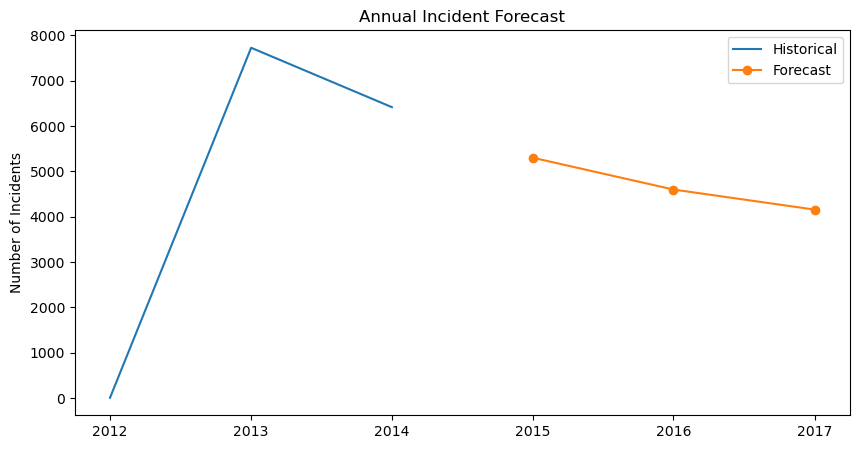

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(annual_data.index, annual_data['Incident_ID'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', marker='o')
plt.title('Annual Incident Forecast')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

#### SARIMAX Model

In [95]:
model = SARIMAX(annual_data['Incident_ID'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=3)
sarimax_forecast = forecast.predicted_mean

sarimax_forecast

2015-01-01    5302.578720
2016-01-01    4600.335413
2017-01-01    4157.822629
Freq: YS-JAN, Name: predicted_mean, dtype: float64

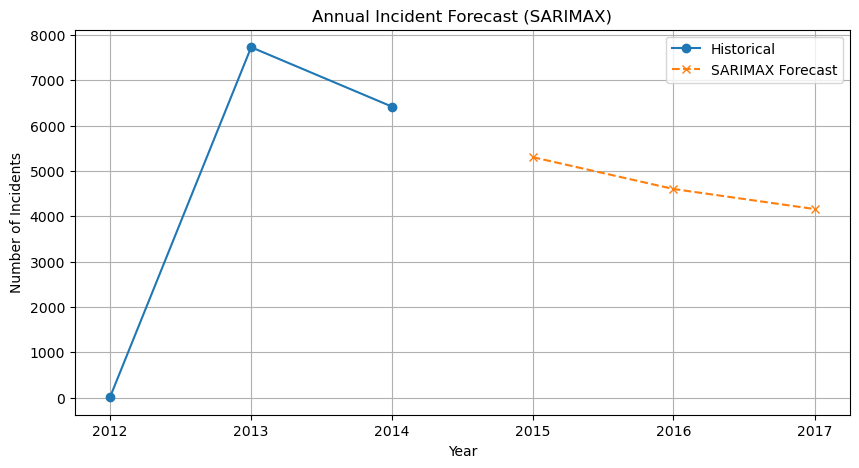

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(annual_data.index, annual_data['Incident_ID'], label='Historical', marker='o')
plt.plot(sarimax_forecast.index, sarimax_forecast, label='SARIMAX Forecast', marker='x', linestyle='--')
plt.title('Annual Incident Forecast (SARIMAX)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.grid(True)
plt.show()


### To auto-tag tickets with the right priority and department to reduce delays.

In [97]:
df3=df1.copy()

In [98]:
Le=LabelEncoder()
df3['Priority']=le.fit_transform(df3['Priority'])

#### Data Splitting

In [99]:
feature_cols = ['CI_Name','CI_Subcat', 'No_of_Reassignments','Status','Closure_Code', 'number_cnt']
X=df3[feature_cols]
Y=df3[['Priority','Category']]

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=y)

#### RandomForest

In [101]:
rfbase_model = RandomForestClassifier()
multi_model = MultiOutputClassifier(rfbase_model)
multi_model.fit(X_train, Y_train)
rfy_pred = multi_model.predict(X_test)

In [102]:
priority_true = Y_test['Priority']
priority_pred = rfy_pred[:, 0]

category_true = Y_test['Category']
category_pred = rfy_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

rf_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {rf_average_accuracy:.4f}')

Average accuracy across both targets: 0.8467


### Decision Tree

In [103]:
dtbase_model = DecisionTreeClassifier()
multi_model = MultiOutputClassifier(dtbase_model)
multi_model.fit(X_train, Y_train)
dty_pred = multi_model.predict(X_test)

In [104]:
priority_true = Y_test['Priority']
priority_pred = dty_pred[:, 0]

category_true = Y_test['Category']
category_pred = dty_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

dt_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {dt_average_accuracy:.4f}')

Average accuracy across both targets: 0.8292


#### SVC

In [108]:
svcbase_model = SVC()
svcmulti_model = MultiOutputClassifier(svcbase_model)
svcmulti_model.fit(X_train, Y_train)
svcy_pred = svcmulti_model.predict(X_test)

In [109]:
priority_true = Y_test['Priority']
priority_pred = svcy_pred[:, 0]

category_true = Y_test['Category']
category_pred = svcy_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

svc_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {svc_average_accuracy:.4f}')

Average accuracy across both targets: 0.7194


#### KNN

In [105]:
knnmulti_model = MultiOutputClassifier(KNeighborsClassifier())
knnmulti_model.fit(X_train, Y_train)
knny_pred = knnmulti_model.predict(X_test)

In [106]:
priority_true = Y_test['Priority']
priority_pred = knny_pred[:, 0]

category_true = Y_test['Category']
category_pred = knny_pred[:, 1]


priority_acc = accuracy_score(priority_true, priority_pred)
category_acc = accuracy_score(category_true, category_pred)

knn_average_accuracy = (priority_acc + category_acc) / 2
print(f'Average accuracy across both targets: {knn_average_accuracy:.4f}')


Average accuracy across both targets: 0.7444


#### Model Comparison Report

In [110]:
comparison_dict = {'Model': ['DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','SVC'],
                   'accuracy_score': [dt_average_accuracy,rf_average_accuracy,knn_average_accuracy,svc_average_accuracy]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
DecisionTreeClassifier        0.829212
RandomForestClassifier        0.846697
  KNeighborsClassifier        0.744437
                   SVC        0.719357


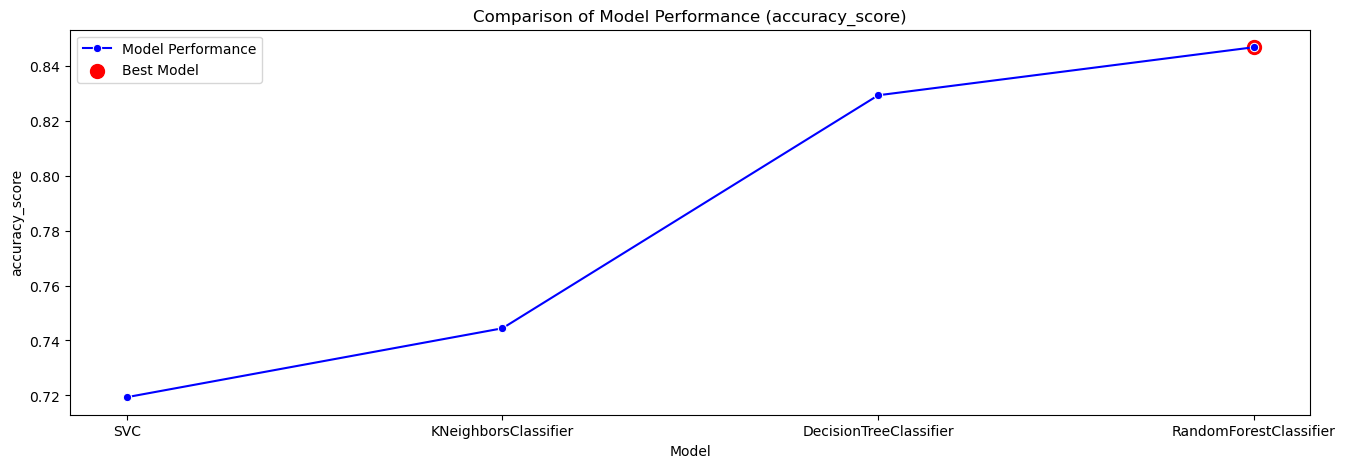

In [111]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### To predict RFC failures to prevent service disruptions.

In [113]:
df4=pd.read_csv('OneDrive/Documents/dataset_list.csv')

In [114]:
#creating a target column
df4['Closure_Code'] = df4['Closure_Code'].astype(str).str.strip().str.lower()
df4['Category'] = df4['Category'].astype(str).str.strip().str.lower()

df4['RFC_Flag'] = np.where(
    (
        ((df4['Priority'] >= 3).astype(int) + 
         (df4['No_of_Reassignments'] > 2).astype(int) + 
         (df4['Closure_Code'].isin(['other', 'software', 'unknown'])).astype(int) + 
         (df4['Category'].str.contains('change')).astype(int)
        ) >= 2
    ),
    1, 0
)

In [115]:
df4 = df4.drop(columns=[
    'Incident_ID', 'Related_Interaction', 'Related_Change', 'KB_number',
    'CI_Name', 'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
    'WBS', 'Urgency', 'Alert_Status','Handle_Time_hrs', 'No_of_Related_Incidents','No_of_Related_Changes'
], errors='ignore')

In [116]:
df4['No_of_Related_Interactions'].fillna(0, inplace=True)

In [117]:
label_cols = ['CI_Cat','CI_Subcat', 'Category', 'Closure_Code','Status']
le = LabelEncoder()

for col in label_cols:
    df4[col] = le.fit_transform(df4[col].astype(str))  

In [118]:
df4.dropna(inplace=True)
df4

CI_Cat  CI_Subcat  Status Impact  Priority  number_cnt  Category  \
0          12         57       0      4       4.0    0.601292         1   
1           1         57       0      3       3.0    0.415050         1   
3           1         57       0      4       4.0    0.642927         1   
4           1         57       0      4       4.0    0.345258         1   
5           1         57       0      4       4.0    0.006676         1   
...       ...        ...     ...    ...       ...         ...       ...   
46601       1         45       0      4       4.0    0.231896         1   
46602       1         45       0      4       4.0    0.805153         1   
46603       3         21       0      5       5.0    0.917466         1   
46604       1         57       0      4       4.0    0.701278         1   
46605       6          6       0      3       3.0    0.902320         1   

       No_of_Reassignments  Closure_Code  No_of_Related_Interactions  RFC_Flag  
0                     26.0             7                         1.0         1  
1                     33.0            11                         1.0         1  
3                     13.0             6                         1.0         1  
4                      2.0             7                         1.0         1  
5                      4.0             7                         1.0         1  
...                    ...           ...                         ...       ...  
46601                  0.0             7                         1.0         1  
46602                  0.0            13                         1.0         0  
46603                  0.0             1                         1.0         0  
46604                  0.0            11                         1.0         1  
46605                  0.0             1                         1.0         0  

[45225 rows x 11 columns]

In [119]:
df4.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Priority', 'number_cnt',
       'Category', 'No_of_Reassignments', 'Closure_Code',
       'No_of_Related_Interactions', 'RFC_Flag'],
      dtype='object')

#### Data Splitting

In [120]:
X = df4.drop('RFC_Flag', axis=1)
y = df4['RFC_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [121]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#### RandomForest

In [122]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=10)

rf_model.fit(X_train_res, y_train_res)

y_pred = rf_model.predict(X_test)

rf_acc= accuracy_score(y_test, y_pred)
print("Accuracy:",rf_acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9957989386792453

Confusion Matrix:
 [[3911   57]
 [   0 9600]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3968
           1       0.99      1.00      1.00      9600

    accuracy                           1.00     13568
   macro avg       1.00      0.99      0.99     13568
weighted avg       1.00      1.00      1.00     13568



In [123]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation

print("Cross-validation scores: ", cv_scores)

print("Mean accuracy: ", np.mean(cv_scores))
print("Standard deviation of accuracy: ", np.std(cv_scores))

Cross-validation scores:  [0.99458264 0.99259259 0.9960199  0.9946932  0.99613046]
Mean accuracy:  0.9948037589828636
Standard deviation of accuracy:  0.0012798050749353539


In [124]:
print(df4['RFC_Flag'].value_counts())

RFC_Flag
1    31741
0    13484
Name: count, dtype: int64


#### Logistic Regression

In [125]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
log_acc= accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:",log_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8203125
Confusion Matrix:
 [[1929 2039]
 [ 399 9201]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.61      3968
           1       0.82      0.96      0.88      9600

    accuracy                           0.82     13568
   macro avg       0.82      0.72      0.75     13568
weighted avg       0.82      0.82      0.80     13568



#### KNN

In [126]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
knn_acc=accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9906397405660378
Confusion Matrix:
 [[3886   82]
 [  45 9555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3968
           1       0.99      1.00      0.99      9600

    accuracy                           0.99     13568
   macro avg       0.99      0.99      0.99     13568
weighted avg       0.99      0.99      0.99     13568



#### SVC

In [127]:
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)
svc_acc= accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:",svc_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.8098466981132075
Confusion Matrix:
 [[1574 2394]
 [ 186 9414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.40      0.55      3968
           1       0.80      0.98      0.88      9600

    accuracy                           0.81     13568
   macro avg       0.85      0.69      0.71     13568
weighted avg       0.83      0.81      0.78     13568



#### Model Comparison Report

In [128]:
comparison_dict = {'Model': ['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC'],
                   'accuracy_score': [log_acc,rf_acc,knn_acc,svc_acc]}

# Creating DataFrame
comparison_df = pd.DataFrame(comparison_dict)
print(comparison_df.to_string(index=False))

                 Model  accuracy_score
    LogisticRegression        0.820312
RandomForestClassifier        0.995799
  KNeighborsClassifier        0.990640
                   SVC        0.809847


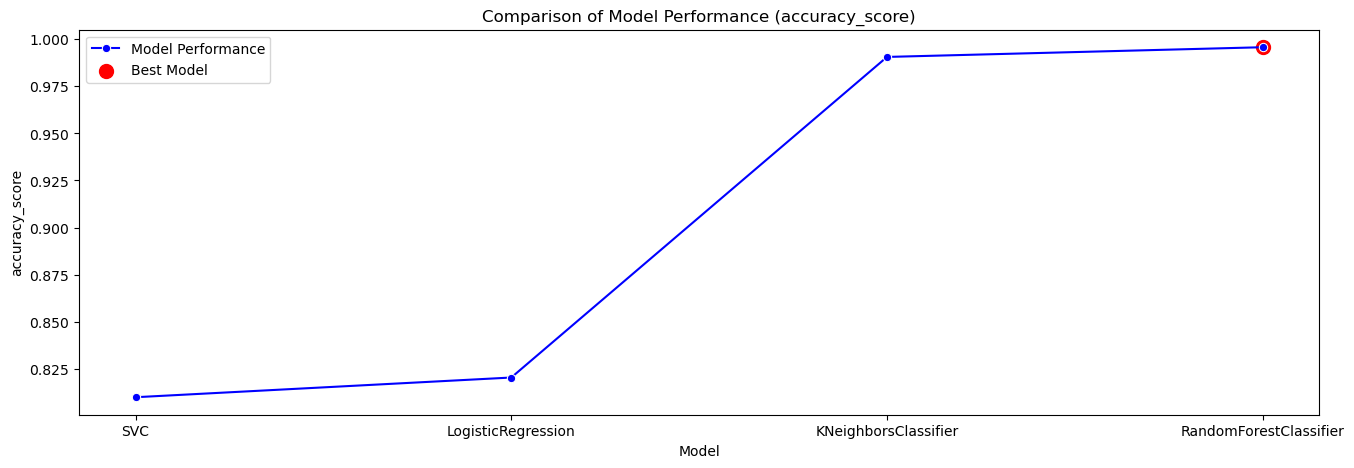

In [129]:
comparison_df = comparison_df.sort_values(by='accuracy_score', ascending=True)

max_index = comparison_df['accuracy_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='accuracy_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'accuracy_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("accuracy_score")
plt.legend()
plt.title("Comparison of Model Performance (accuracy_score)")
plt.show()

### REPORT

1. Predict High-Priority Incidents:
- Approach Used: Classification models including Random Forest, Logistic Regression, DecisionTree, SVM, etc., along with SMOTE to handle class imbalance.
- The models effectively identified high-priority incidents, especially after addressing class imbalance. Random Forest and DecisionTree gave strong accuracy, enabling proactive responses.

2. Forecast Incident Volumes:
- Approach Used: Time series forecasting using ARIMA and SARIMAX at both quarterly and annual levels.
- The models provided reliable forecasts for future incident volumes, supporting resource and workforce planning. SARIMAX performed better due to its ability to handle seasonality and exogenous variables.

3. Auto-Tagging Tickets with Priority and Category:
- Approach Used: MultiOutputClassifier with Random Forest and DecisionTree for joint prediction of Priority and Category.
- The model successfully automated tagging of tickets, reducing manual errors and delays. Random Forest with hyperparameter tuning delivered good accuracy across both targets.

4. Predict RFC Failures or Misconfigurations:
- Approach Used: Classification models considered but hindered by severe class imbalance (e.g., only 1 RFC failure out of thousands).
- The Random Forest model delivers excellent performance with ~99.6% accuracy and strong cross-validation stability. It effectively predicts RFC failures and asset misconfigurations.